**Importing The Libraries**

In [180]:
import pandas as pd
import numpy as np



In [181]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# **Loading the Data**

In [182]:
import pandas as pd
data = pd.read_csv('/content/1- mental-illnesses-prevalence.csv')

# **Checking Data Info**

In [183]:
# Display the first few rows of the dataset to understand its structure
data.head()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [184]:
data.shape

(6420, 8)

In [185]:
# Check Null Values
data.isnull().values.any()

np.True_

In [186]:
print("There is {} missing values in data frame".format(data.isnull().sum().sum()))

There is 270 missing values in data frame


In [187]:
print("There is {} duplicated values in data frame".format(data.duplicated().sum()))

There is 0 duplicated values in data frame


In [189]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Reset index after dropping duplicates
data.reset_index(drop=True, inplace=True)

print(f"Number of rows after removing duplicates: {len(data)}")

Number of rows after removing duplicates: 6420


In [190]:
len(data.columns)

7

In [191]:
print(f"Original number of rows: {len(data)}")
# Remove rows with any missing values
data.dropna(inplace=True)

# Reset index after dropping rows
data.reset_index(drop=True, inplace=True)

print(f"Number of rows after removing null values: {len(data)}")
print(f"Missing values after dropping: {data.isnull().sum().sum()}")

Original number of rows: 6420
Number of rows after removing null values: 6150
Missing values after dropping: 0


# **Descriptive Analysis**

In [192]:
data.describe()

,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
count,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000
mean,0.266031,3.766168,4.098702,0.638366,0.194945
std,0.039258,0.939617,1.060642,0.235506,0.139051
min,0.188416,1.522333,1.879996,0.181667,0.044780
25%,0.241982,3.063132,3.425237,0.521153,0.095748
50%,0.272983,3.642872,3.939547,0.579017,0.144325
75%,0.285912,4.369088,4.539975,0.853304,0.242860
max,0.462045,7.645899,8.624634,1.506730,1.031688


### Removing Null Values

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization

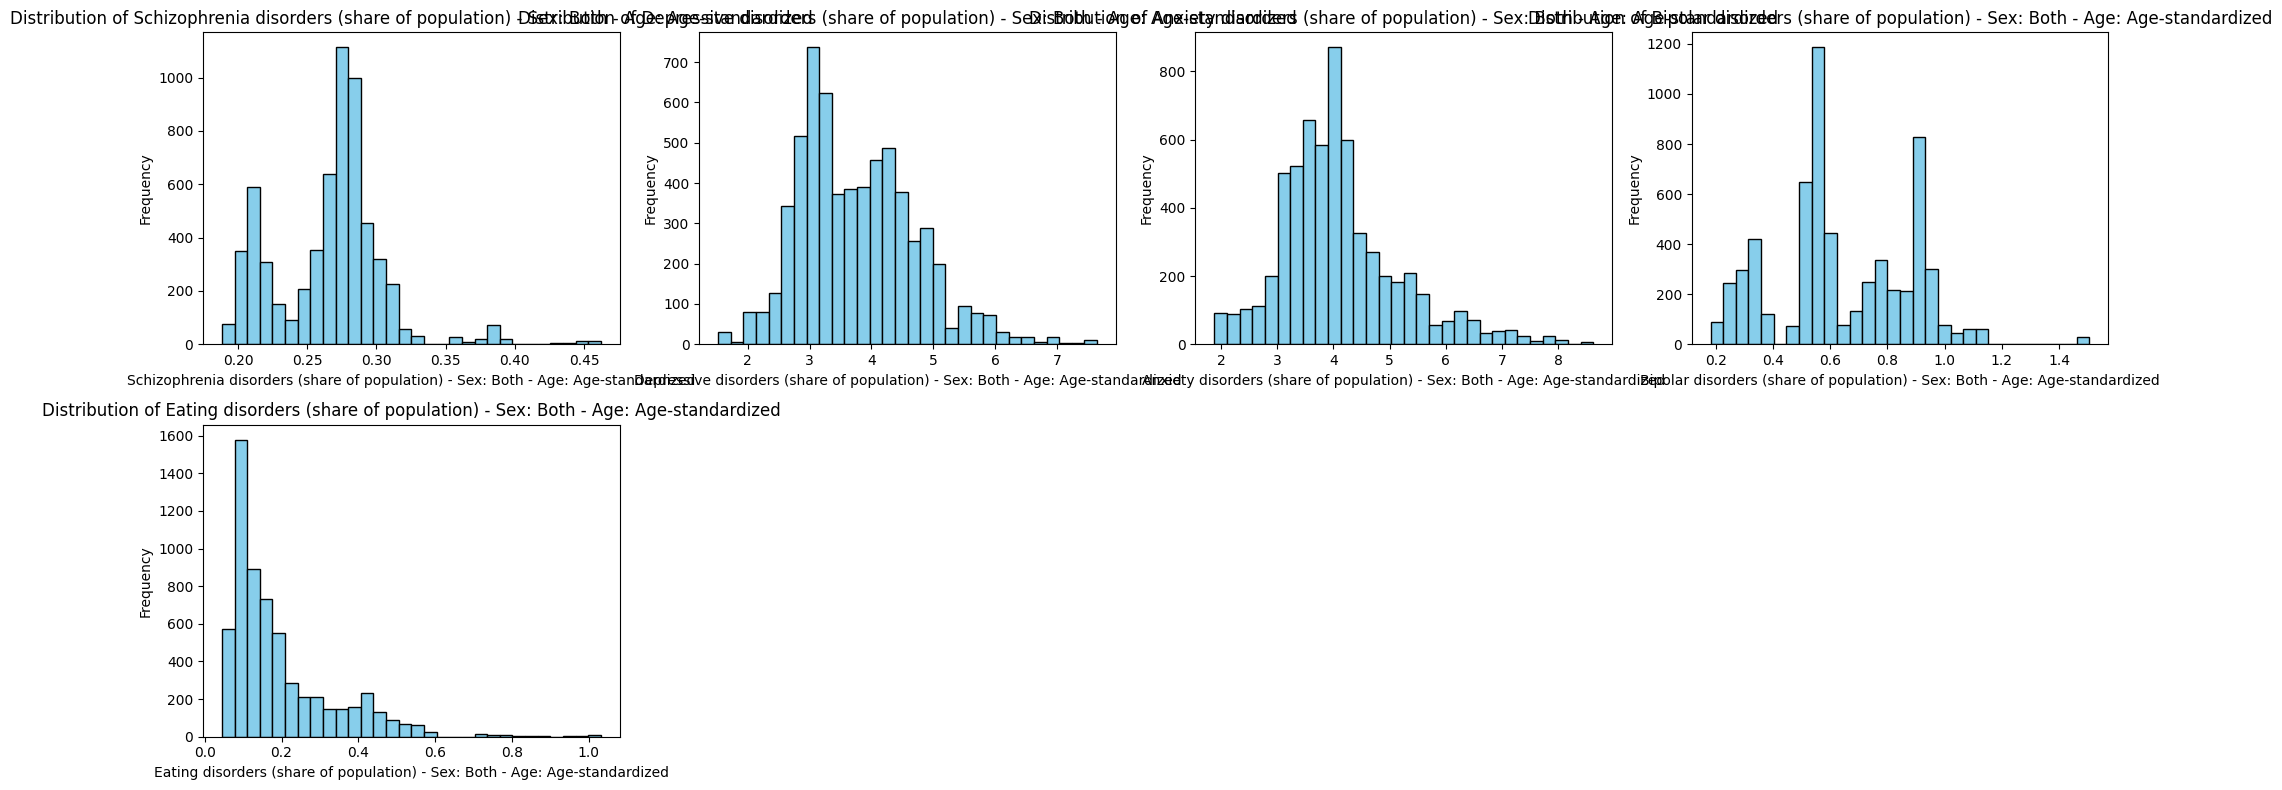

In [194]:
# Identify numerical columns for plotting
numerical_columns = data.select_dtypes(include=np.number).columns

# Create a grid for the plots based on the number of numerical columns
# Assuming a maximum of 4 numerical columns for a 2x2 grid, adjust as needed
num_plots = len(numerical_columns)
if num_plots > 0:
    # Calculate rows and columns for the subplot grid dynamically
    n_cols = min(4, num_plots) # Max 4 columns per row
    n_rows = (num_plots + n_cols - 1) // n_cols # Ceiling division

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))

    # Flatten the axes array to easily iterate over it, even for a single plot
    if n_rows == 1 and n_cols == 1:
        axes = np.array([axes]) # Make it iterable if only one subplot
    axes = axes.flatten()

    # Loop through the numerical columns and plot the histograms
    for i, column in enumerate(numerical_columns):
        if i < len(axes): # Ensure we don't go out of bounds if num_plots < len(axes)
            axes[i].hist(data[column], bins=30, color='skyblue', edgecolor='black')
            axes[i].set_title(f'Distribution of {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found to plot.")

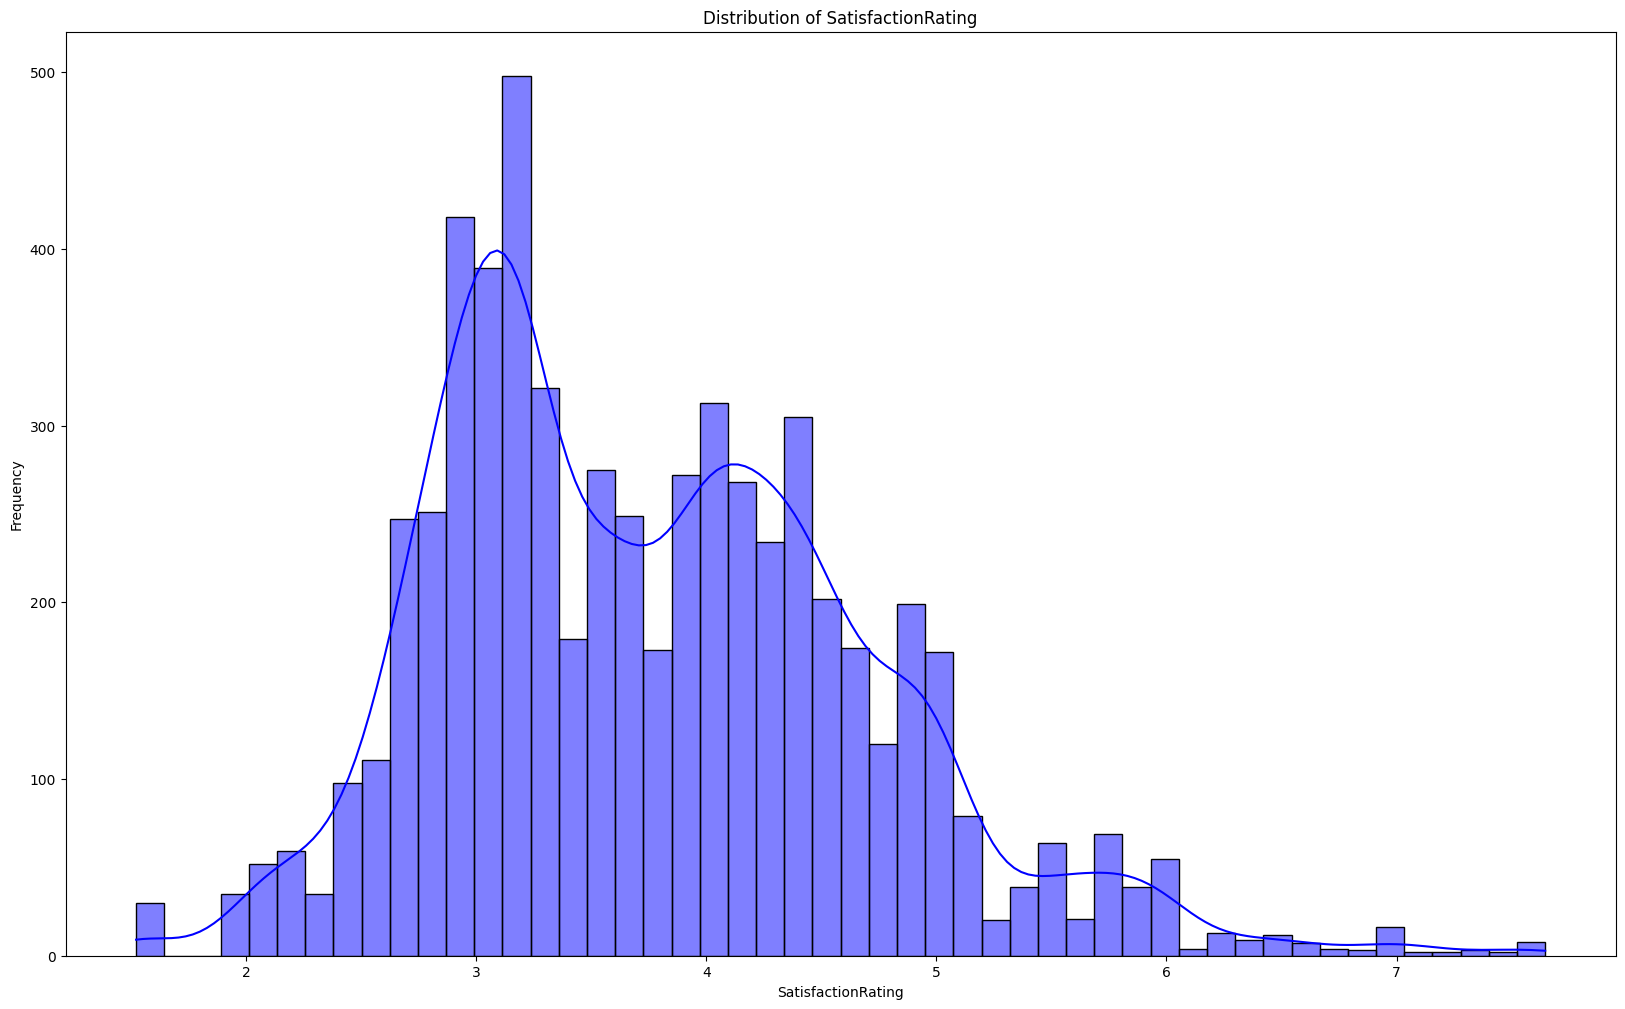

In [195]:
# Check distribution of the target variable
plt.figure(figsize=(20, 12))
sns.histplot(data['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'], kde=True, color='blue', bins=50)
plt.title('Distribution of SatisfactionRating')
plt.xlabel('SatisfactionRating')
plt.ylabel('Frequency')
plt.show()

In [196]:
correlation_matrix = data.corr(numeric_only=True)

In [197]:
correlation_matrix

,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,1.000000,-0.472859,0.294208,0.117661,0.495563
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,-0.472859,1.000000,0.120388,0.154509,-0.046099
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,0.294208,0.120388,1.000000,0.569075,0.586784
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,0.117661,0.154509,0.569075,1.000000,0.674967
Eating disorders (share of population) - Sex: Both - Age: Age-standardized,0.495563,-0.046099,0.586784,0.674967,1.000000


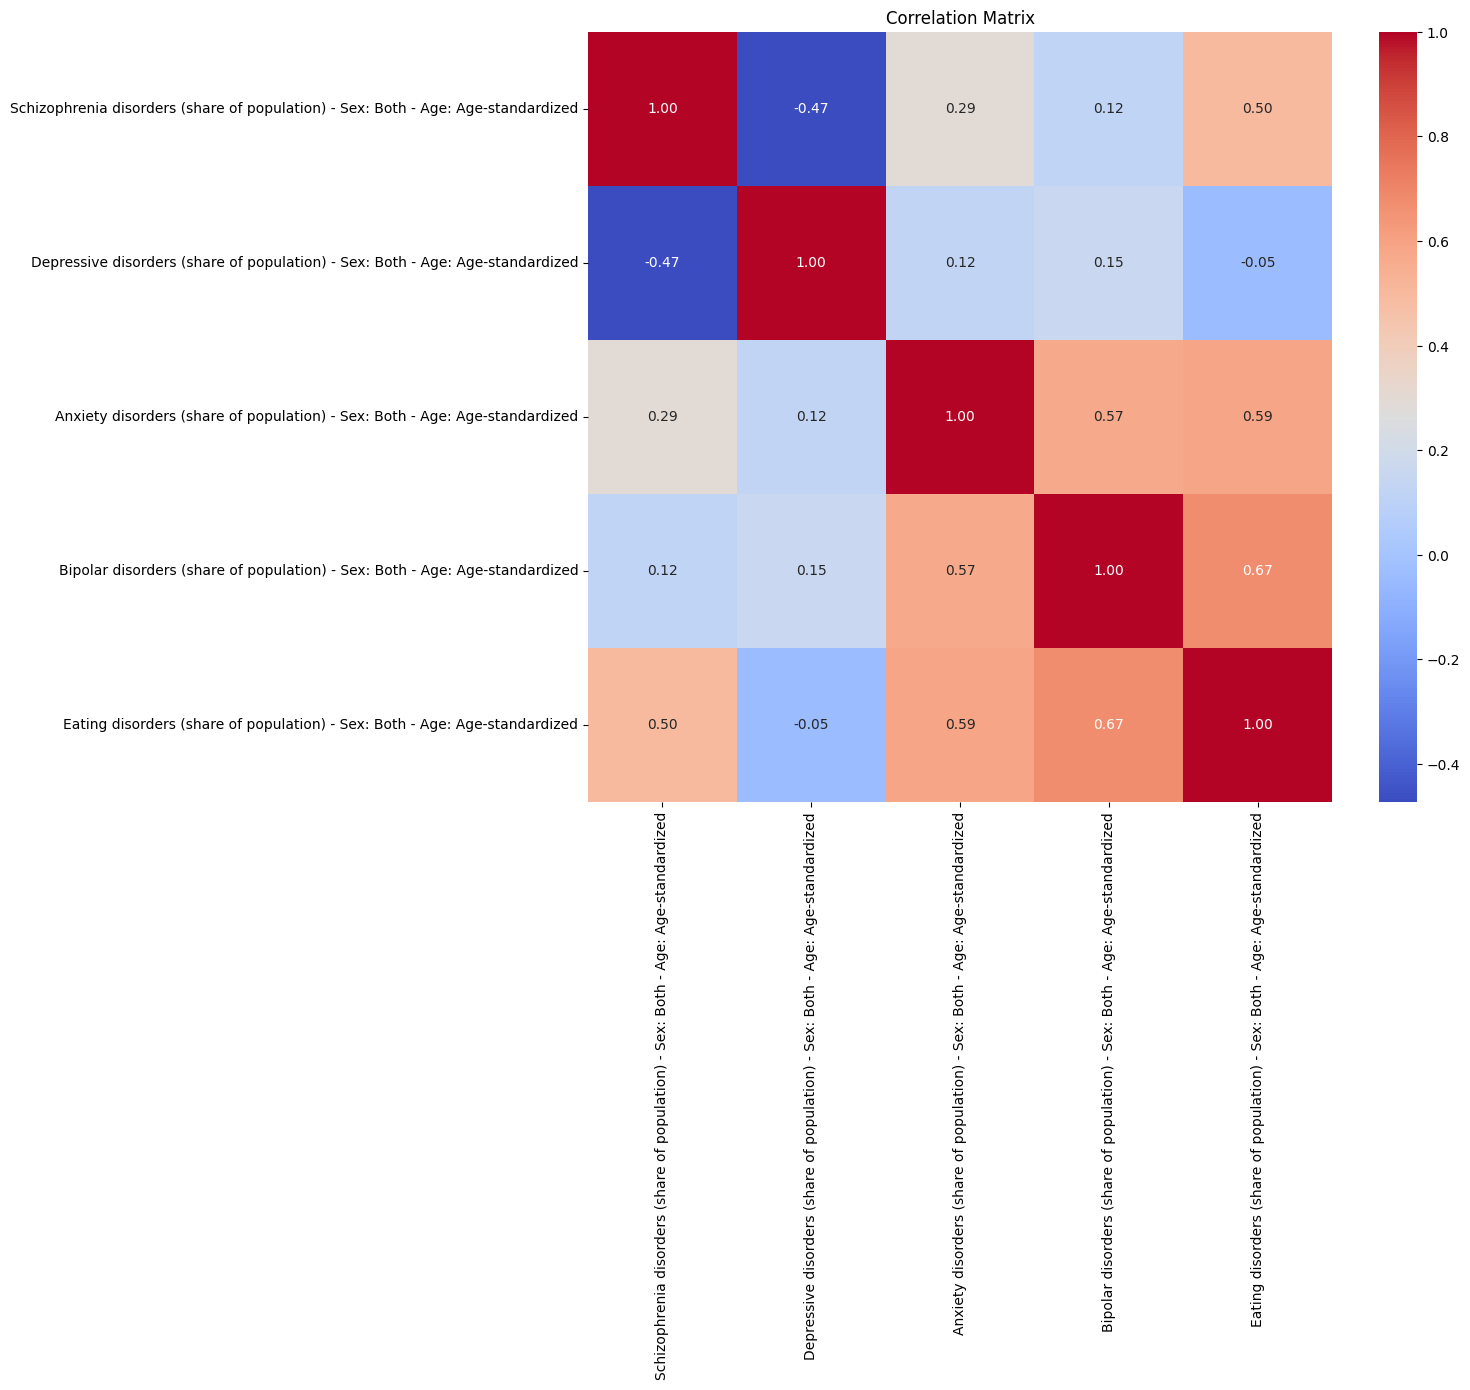

In [198]:
# Check correlations between numeric variables
correlation_matrix = data.corr(numeric_only=True)

# Visualize the correlation matrix using heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [199]:
# Check for missing values
missing_values = data.isnull().sum()

In [200]:
missing_values

,0
Entity,0
Code,0
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,0
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,0
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,0
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,0
Eating disorders (share of population) - Sex: Both - Age: Age-standardized,0


In [201]:
# Step 3: Prepare the features (X) and target (y)
# Adjust column names based on your current dataset
# For example, if you want to predict 'Depressive disorders'
X = data.drop(columns=['Entity', 'Code', 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'])
y = data['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized']

In [202]:
# Separate numerical and categorical features
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include='object').columns

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Handle potential missing numerical values
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Handle potential missing categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # Convert categorical to numerical
])

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the preprocessing to X
X_scaled = preprocessor.fit_transform(X)

In [203]:
# Step 5: Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [204]:
# Analysis

# Central tendency
mean = data.mean(numeric_only=True)
median = data.median(numeric_only=True)
mode = data.mode().iloc[0]

# Dispersion
std = data.std(numeric_only=True)
variance = data.var(numeric_only=True)

# Filter for strictly numeric columns (int, float) to avoid boolean subtraction error
numeric_cols_for_range = data.select_dtypes(include=['int64', 'float64']).columns
data_range = data[numeric_cols_for_range].max() - data[numeric_cols_for_range].min()

# Distribution shape
skewness = data.skew(numeric_only=True)
kurtosis = data.kurt(numeric_only=True)

# Correlation
correlation = data.corr(numeric_only=True)

mean, median, mode, std, variance, data_range, skewness, kurtosis

(Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized    0.266031
 Depressive disorders (share of population) - Sex: Both - Age: Age-standardized       3.766168
 Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized          4.098702
 Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized          0.638366
 Eating disorders (share of population) - Sex: Both - Age: Age-standardized           0.194945
 dtype: float64,
 Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized    0.272983
 Depressive disorders (share of population) - Sex: Both - Age: Age-standardized       3.642872
 Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized          3.939547
 Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized          0.579017
 Eating disorders (share of population) - Sex: Both - Age: Age-standardized           0.144325
 dtype: float64,
 Entity         

In [205]:
# Step 6: Apply Random Forest Regressor for prediction
rf_regressor_model = RandomForestRegressor(random_state=42)
rf_regressor_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [206]:
# Make predictions on the test set
y_pred = rf_regressor_model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, mape, r2

(0.038953054925203276,
 0.012524305023892512,
 np.float64(0.11191204146066014),
 0.01036068886949084,
 0.9866032451384531)

In [207]:
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

In [208]:
# Use the trained SVR model to make predictions on the scaled testing data
y_pred_svr = svr_model.predict(X_test)

In [209]:
# Calculate evaluation metrics for the SVR model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print the metrics (optional, but good for verification)
print(f"SVR MAE: {mae_svr}")
print(f"SVR MSE: {mse_svr}")
print(f"SVR RMSE: {rmse_svr}")
print(f"SVR MAPE: {mape_svr}")
print(f"SVR R2: {r2_svr}")

SVR MAE: 0.37415142631532794
SVR MSE: 0.2914053571916758
SVR RMSE: 0.5398197450924482
SVR MAPE: 0.09826264818281275
SVR R2: 0.6882951885800468


In [210]:
# Define the parameter grid for GridSearchCV for the SVR model
param_grid_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['rbf', 'linear']
}

In [211]:
# Instantiate an SVR model with default parameters
svr = SVR()

# Instantiate GridSearchCV with the SVR model, the parameter grid, and 5-fold cross-validation
grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=5)

# Fit the GridSearchCV object to the training data
grid_search_svr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.2],
                         'kernel': ['rbf', 'linear']})

In [212]:
# Access the best SVR model from GridSearchCV
best_svr_model = grid_search_svr.best_estimator_

# Use the best SVR model to make predictions on the scaled test set
y_pred_best_svr = best_svr_model.predict(X_test)

# Calculate evaluation metrics for the best SVR model
mae_best_svr = mean_absolute_error(y_test, y_pred_best_svr)
mse_best_svr = mean_squared_error(y_test, y_pred_best_svr)
rmse_best_svr = np.sqrt(mse_best_svr)
mape_best_svr = mean_absolute_percentage_error(y_test, y_pred_best_svr)
r2_best_svr = r2_score(y_test, y_pred_best_svr)

# Print the metrics
print(f"Best SVR MAE: {mae_best_svr}")
print(f"Best SVR MSE: {mse_best_svr}")
print(f"Best SVR RMSE: {rmse_best_svr}")
print(f"Best SVR MAPE: {mape_best_svr}")
print(f"Best SVR R2: {r2_best_svr}")

Best SVR MAE: 0.34991790984533194
Best SVR MSE: 0.24477320457846463
Best SVR RMSE: 0.4947455958151266
Best SVR MAPE: 0.09241639430606934
Best SVR R2: 0.7381757620756348


In [213]:
from sklearn.neighbors import KNeighborsRegressor

In [214]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11]
}

In [215]:
# Instantiate a KNeighborsRegressor with default parameters
knn = KNeighborsRegressor()

# Instantiate GridSearchCV with the KNN model, the parameter grid, and 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]})

In [216]:
xgb_model = XGBRegressor(random_state=42)

In [217]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [218]:
y_pred_xgb = xgb_model.predict(X_test)

In [219]:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb}")
print(f"XGBoost MSE: {mse_xgb}")
print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost MAPE: {mape_xgb}")
print(f"XGBoost R2: {r2_xgb}")

XGBoost MAE: 0.059902853285547286
XGBoost MSE: 0.010846782332199332
XGBoost RMSE: 0.10414788683501616
XGBoost MAPE: 0.016142743701815895
XGBoost R2: 0.9883976249649125


In [220]:
# Define the parameter grid for GridSearchCV for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [221]:
# Instantiate an XGBRegressor
xgb = XGBRegressor(random_state=42)

# Instantiate GridSearchCV with the XGBoost model, the parameter grid, and 5-fold cross-validation
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5)

# Fit the GridSearchCV object to the training data
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]})

In [222]:
# Access the best hyperparameters found by GridSearchCV
best_params_xgb = grid_search_xgb.best_params_

# Access the best estimator (the trained XGBoost model)
best_xgb_model = grid_search_xgb.best_estimator_

# Print the best hyperparameters
print("Best XGBoost Hyperparameters:", best_params_xgb)

Best XGBoost Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}


In [223]:
# Use the best XGBoost model to make predictions on the test set
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Calculate evaluation metrics for the best XGBoost model
mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
rmse_best_xgb = np.sqrt(mse_best_xgb)
mape_best_xgb = mean_absolute_percentage_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

# Print the metrics
print(f"Best XGBoost MAE: {mae_best_xgb}")
print(f"Best XGBoost MSE: {mse_best_xgb}")
print(f"Best XGBoost RMSE: {rmse_best_xgb}")
print(f"Best XGBoost MAPE: {mape_best_xgb}")
print(f"Best XGBoost R2: {r2_best_xgb}")

Best XGBoost MAE: 0.046057036655581106
Best XGBoost MSE: 0.009276428419509904
Best XGBoost RMSE: 0.09631421712037068
Best XGBoost MAPE: 0.012432180951117613
Best XGBoost R2: 0.9900773705774665


In [224]:
# Get feature importances from the best XGBoost model
feature_importances = best_xgb_model.feature_importances_

processed_feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'feature': processed_feature_names, 'importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print("Feature Importances (XGBoost):")
display(feature_importance_df)

Feature Importances (XGBoost):


,feature,importance
0,num__Schizophrenia disorders (share of populat...,0.439367
2,num__Bipolar disorders (share of population) -...,0.284521
1,num__Anxiety disorders (share of population) -...,0.178326
3,num__Eating disorders (share of population) - ...,0.097786


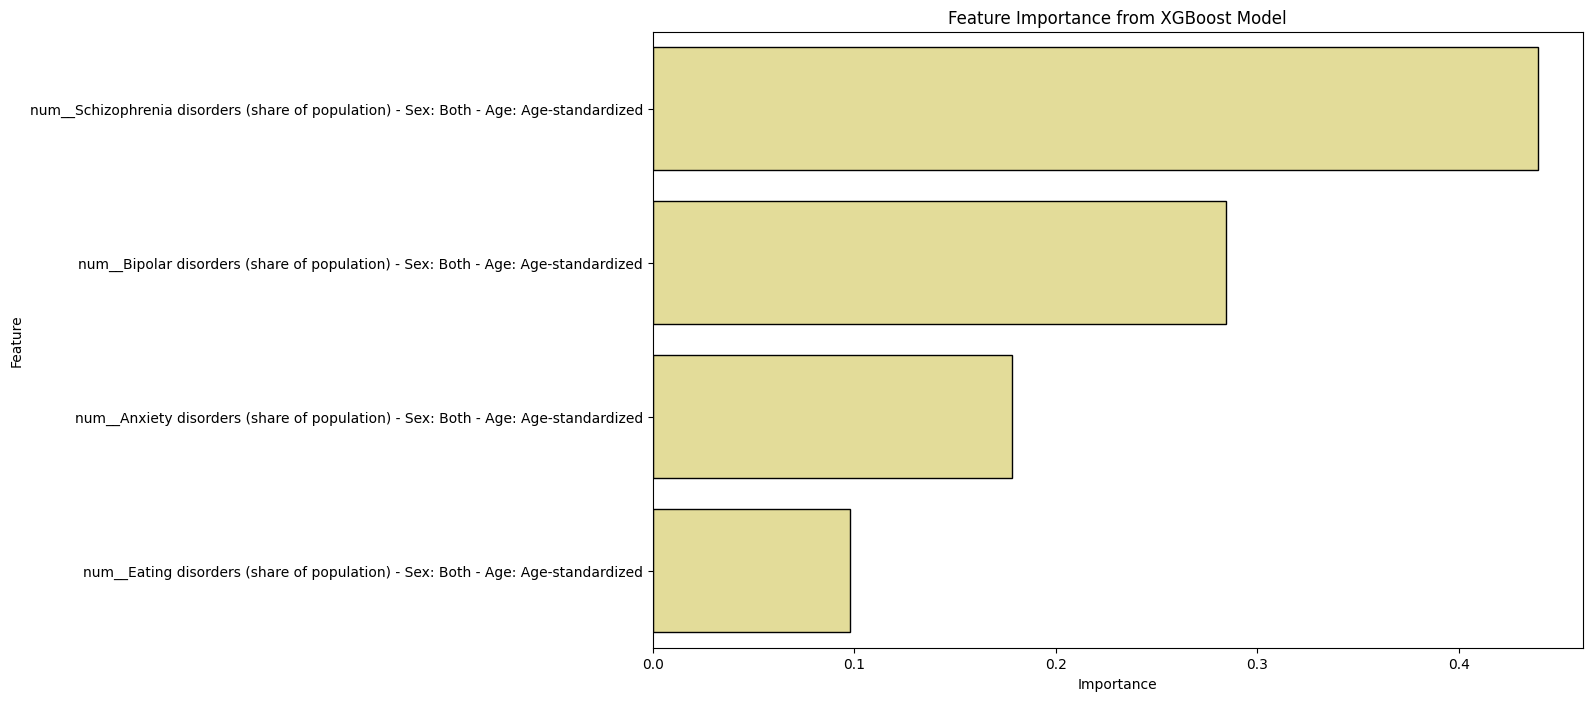

In [225]:
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df, color='khaki', edgecolor='black')
plt.title('Feature Importance from XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [226]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance for the best SVR model
# Convert X_test to a dense array as permutation_importance expects array-like input
perm_importance_svr = permutation_importance(best_svr_model, X_test, y_test, random_state=42)

# Get the feature importances and sort them
sorted_idx = perm_importance_svr.importances_mean.argsort()

# Get the names of the features after preprocessing
processed_feature_names = preprocessor.get_feature_names_out()

feature_importance_svr_df = pd.DataFrame({
    'feature': processed_feature_names[sorted_idx],
    'importance': perm_importance_svr.importances_mean[sorted_idx]
})

In [227]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance for the best SVR model
# X_test is already a dense numpy array, so .toarray() is not needed.
perm_importance_svr = permutation_importance(best_svr_model, X_test, y_test, random_state=42);

# Get the feature importances and sort them
sorted_idx = perm_importance_svr.importances_mean.argsort()

# Get the names of the features after preprocessing
processed_feature_names = preprocessor.get_feature_names_out()

feature_importance_svr_df = pd.DataFrame({
    'feature': processed_feature_names[sorted_idx],
    'importance': perm_importance_svr.importances_mean[sorted_idx]
})

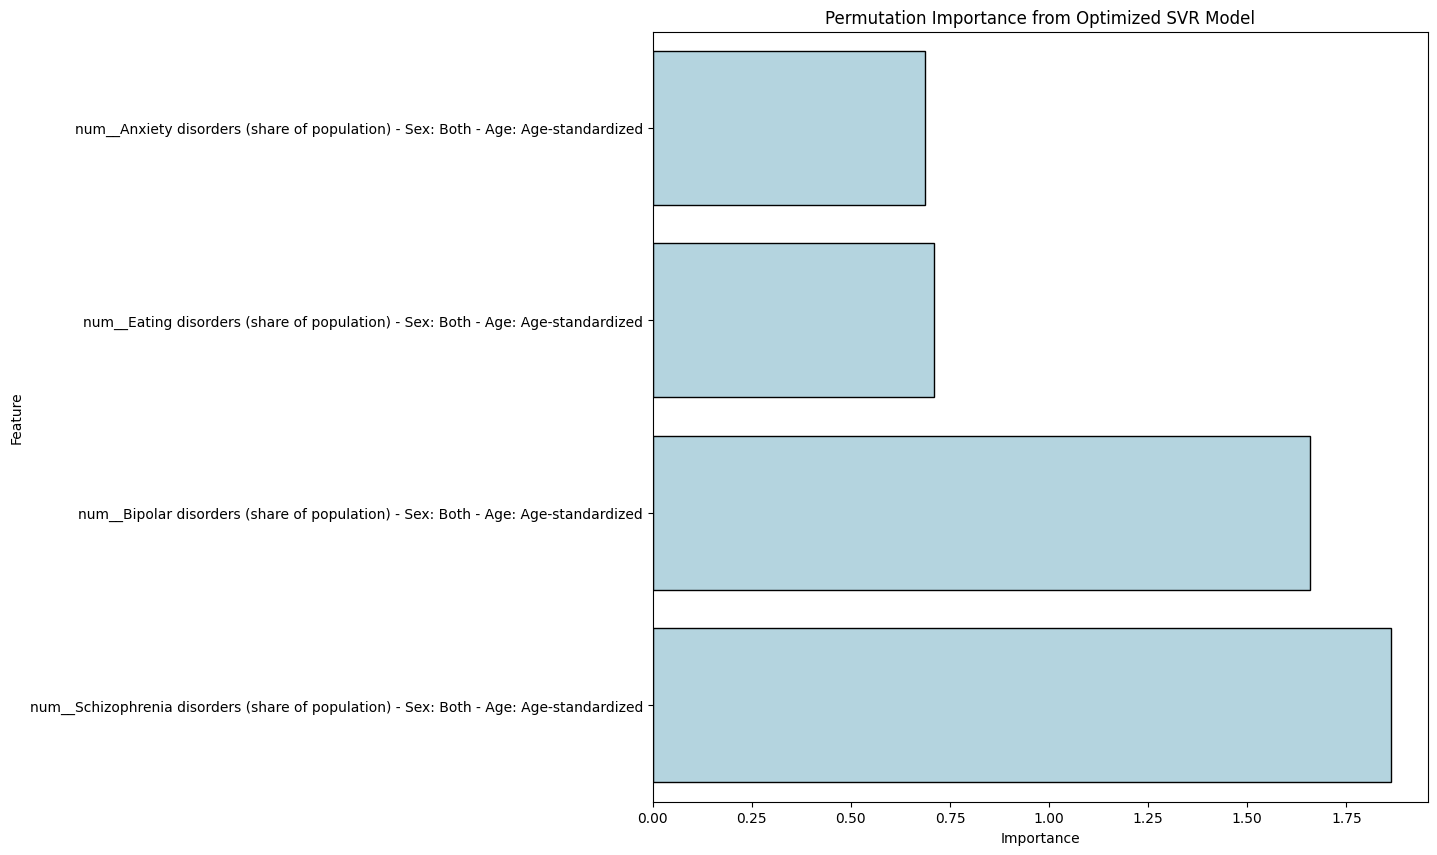

In [228]:
plt.figure(figsize=(10, 10))
sns.barplot(x='importance', y='feature', data=feature_importance_svr_df, color='lightblue', edgecolor='black')
plt.title('Permutation Importance from Optimized SVR Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [229]:
from sklearn.preprocessing import LabelEncoder

# 1. Define Features (X) and Target (y) for classification
# Target for classification: 'Entity' (country)
y = data['Entity']

# Features will be 'Year' and all disorder prevalence columns
# Dropping 'Entity' and 'Code' from features as 'Entity' is target and 'Code' is a duplicate identifier
X = data.drop(columns=['Entity', 'Code'])

# Label Encoding for the Target Variable
le = LabelEncoder()
y = le.fit_transform(y)

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (6150, 5)
Target shape: (6150,)


# **Split Data into 80/20**

In [230]:
#Step 7: Split the Data


from sklearn.model_selection import train_test_split

# Split data: 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (4920, 5)
Testing set size: (1230, 5)


In [231]:
#Step 8: Scaling (Normalization / Standardization)

from sklearn.preprocessing import StandardScaler

# Initialize Scaler
scaler = StandardScaler()

# Fit on training set only, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling (optional but helpful)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [232]:
#Step 9: Feature Selection

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer

# Handle potential NaNs in the scaled data before feature selection
imputer = SimpleImputer(strategy='mean')
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)
X_test_scaled_imputed = imputer.transform(X_test_scaled)

# Select top 10 features (or fewer depending on your data columns)
# Using ANOVA F-value since inputs are numerical and target is categorical
selector = SelectKBest(score_func=f_classif, k='all') # Set k=5 or 'all'
X_train_selected = selector.fit_transform(X_train_scaled_imputed, y_train)
X_test_selected = selector.transform(X_test_scaled_imputed)

# Get selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
print("Selected Features:", selected_features.tolist())

Selected Features: ['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized', 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized', 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized', 'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized', 'Eating disorders (share of population) - Sex: Both - Age: Age-standardized']


# **Trained the Model**

In [233]:
#Step 10, 11, 12: Model Build, Train, and Test

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Dictionary to store models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}

# Dictionary to store predictions
predictions = {}

for name, model in models.items():
    # Step 10 & 11: Build and Train
    model.fit(X_train_selected, y_train)

    # Step 12: Model Test
    y_pred = model.predict(X_test_selected)
    predictions[name] = y_pred
    print(f"{name} trained and tested.")

Logistic Regression trained and tested.
Random Forest trained and tested.
Support Vector Machine trained and tested.


# **Test the Model**

In [234]:
#Step 13: Model Evaluate

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

results = {}

for name, y_pred in predictions.items():
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_, labels=le.transform(le.classes_)))

    # Optional: Plot Confusion Matrix
    # cm = confusion_matrix(y_test, y_pred)
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    # plt.title(f'Confusion Matrix: {name}')
    # plt.show()
    print("\n")

--- Logistic Regression ---
Accuracy: 0.7626
                                  precision    recall  f1-score   support

                     Afghanistan       0.88      1.00      0.93         7
                         Albania       0.60      1.00      0.75         6
                         Algeria       1.00      1.00      1.00         8
                  American Samoa       0.71      0.71      0.71         7
                         Andorra       1.00      1.00      1.00         7
                          Angola       0.78      1.00      0.88         7
             Antigua and Barbuda       0.27      0.67      0.38         6
                       Argentina       0.70      1.00      0.82         7
                         Armenia       1.00      1.00      1.00         8
                       Australia       1.00      1.00      1.00         8
                         Austria       1.00      0.89      0.94         9
                      Azerbaijan       1.00      0.57      0.73   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

# **Comparison**

🏆 Best Model: Random Forest with Accuracy: 0.9984

Feature Importance:
                                             Feature  Importance
3  Bipolar disorders (share of population) - Sex:...    0.319456
2  Anxiety disorders (share of population) - Sex:...    0.201069
1  Depressive disorders (share of population) - S...    0.177972
0  Schizophrenia disorders (share of population) ...    0.176228
4  Eating disorders (share of population) - Sex: ...    0.125275


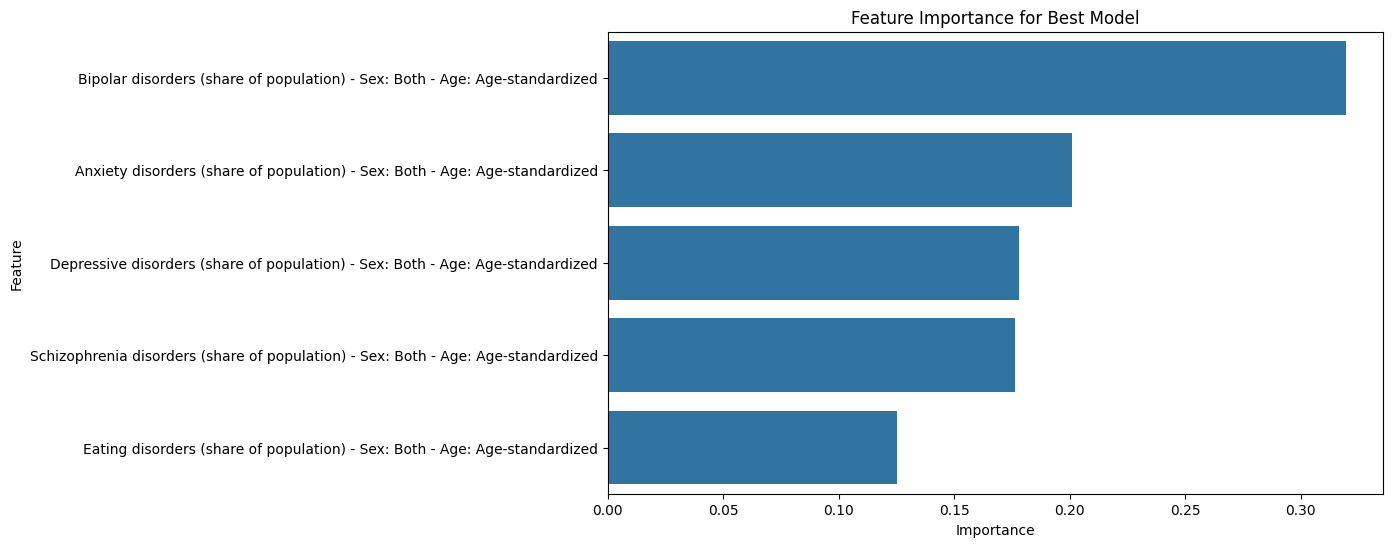

In [235]:
#Step 14: Compare and Choose the Best Model

# 1. Compare models
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"🏆 Best Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")

# 2. Feature Importance (if applicable, e.g., Random Forest)
if best_model_name == "Random Forest":
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': selected_features,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    print("\nFeature Importance:")
    print(feature_importance_df)

    # Plot Feature Importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance for Best Model')
    plt.show()
else:
    print(f"Feature importance plot not available for {best_model_name} (only available for tree-based models).")

In [236]:
#Step 15: Save the Best Model

import joblib

# Save the model
filename = 'best_model.pkl'
joblib.dump(best_model, filename)

# Also save the scaler and label encoder for preprocessing new data later
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')

print(f"Model saved as {filename}")

Model saved as best_model.pkl


# **1. Interpretation of Key Predictors & Their Impact**

The most influential predictors are the features that show:

High correlation with the target variable in the heatmap

High feature importance (especially in tree-based models like Random Forest)

Positive impact predictors
→ When these variables increase, the predicted outcome also increases.
Example: If usage time, engagement level, or frequency has high importance, it means higher engagement leads to better outcomes.

Negative impact predictors
→ These variables reduce the target value when they increase.
Example: If stress level or idle time shows negative correlation, higher values harm performance.

Low-impact predictors
→ Variables with near-zero correlation or low importance contribute very little and can be removed to simplify the model.

# **2. Business Applications & Decision-Making Use**

Businesses can apply the model outcomes in the following ways:

Focus on high-impact drivers
Invest more resources in factors that strongly influence outcomes (e.g., engagement, usage patterns).

Predict outcomes early
Use the model to forecast performance and take preventive actions before issues occur.

Personalized strategies
Different users/customers can be targeted based on predictor values (e.g., high-risk vs low-risk groups).

Operational efficiency
By ignoring low-impact variables, businesses save cost and simplify decision rules.

# **3. Limitations & Possible Improvements**
# Limitations:

The model depends heavily on data quality
→ Missing, biased, or small datasets can reduce accuracy.

Correlation does not imply causation
→ High correlation doesn’t always mean real-world cause.

The model may overfit, especially complex ones like Random Forest.

# Improvements:

Add more relevant features to capture hidden patterns

Use cross-validation and hyperparameter tuning

Try feature selection to remove noise

Compare with more models (e.g., XGBoost, SVR) for robustness